# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
import os

!git clone https://github.com/Kerbabyk/2024-Kondratenkov-TimeSeriesCourse.git

os.chdir('2024-Kondratenkov-TimeSeriesCourse/practice/06 Chains')

print(os.getcwd())

Cloning into '2024-Kondratenkov-TimeSeriesCourse'...
remote: Enumerating objects: 739, done.
remote: Counting objects: 100% (356/356), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 739 (delta 248), reused 269 (delta 190), pack-reused 383 (from 1)
Receiving objects: 100% (739/739), 220.49 MiB | 21.16 MiB/s, done.
Resolving deltas: 100% (312/312), done.
Updating files: 100% (203/203), done.
/content/2024-Kondratenkov-TimeSeriesCourse/practice/06 Chains


In [2]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

In [ ]:
# INSERT YOUR CODE

Самая длинная цепочка: 14 звеньев
Индексы начала звеньев: [44]


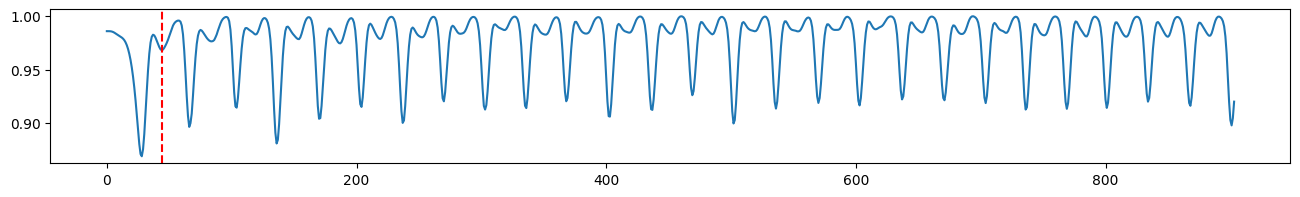

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Считывание данных
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Инициализация переменных для поиска цепочек
max_chain_length = 0
current_chain_length = 1
start_indices = []
current_start_index = 0

# Проход по временному ряду для поиска цепочек
for i in range(1, len(ts)):
    if ts[i] > ts[i - 1]:  # Проверка на монотонность (возрастание)
        current_chain_length += 1
    else:
        if current_chain_length > max_chain_length:
            max_chain_length = current_chain_length
            start_indices = [current_start_index]
        elif current_chain_length == max_chain_length:
            start_indices.append(current_start_index)

        current_chain_length = 1
        current_start_index = i

# Проверка последней цепочки
if current_chain_length > max_chain_length:
    max_chain_length = current_chain_length
    start_indices = [current_start_index]
elif current_chain_length == max_chain_length:
    start_indices.append(current_start_index)

# Вывод результатов
print(f"Самая длинная цепочка: {max_chain_length} звеньев")
print(f"Индексы начала звеньев: {start_indices}")

# Построение графика
fig, ax = plt.subplots(figsize=(16, 2))
ax.plot(ts)

# Выделение начала звеньев на графике
for start_index in start_indices:
    ax.axvline(x=start_index, color='r', linestyle='--')

plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

In [ ]:
# INSERT YOUR CODE

Самая длинная цепочка: 14 звеньев
Индексы начала звеньев: [44]


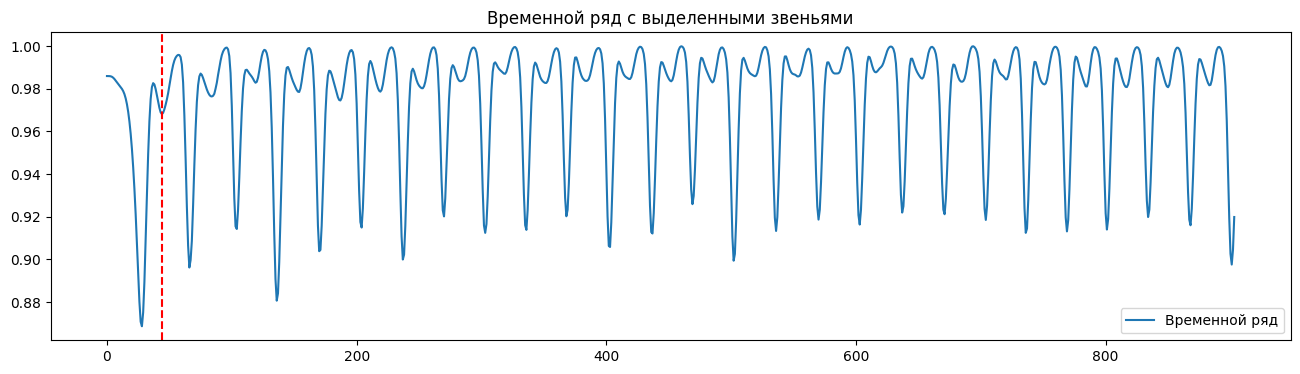

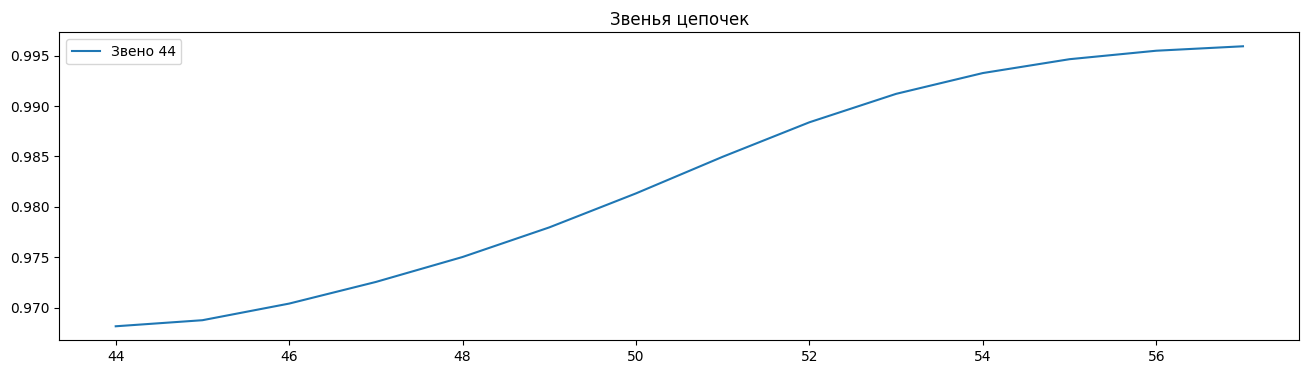

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Считывание данных
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Инициализация переменных для поиска цепочек
max_chain_length = 0
current_chain_length = 1
start_indices = []
current_start_index = 0

# Проход по временному ряду для поиска цепочек
for i in range(1, len(ts)):
    if ts[i] > ts[i - 1]:  # Проверка на монотонность (возрастание)
        current_chain_length += 1
    else:
        if current_chain_length > max_chain_length:
            max_chain_length = current_chain_length
            start_indices = [current_start_index]
        elif current_chain_length == max_chain_length:
            start_indices.append(current_start_index)

        current_chain_length = 1
        current_start_index = i

# Проверка последней цепочки
if current_chain_length > max_chain_length:
    max_chain_length = current_chain_length
    start_indices = [current_start_index]
elif current_chain_length == max_chain_length:
    start_indices.append(current_start_index)

# Вывод результатов
print(f"Самая длинная цепочка: {max_chain_length} звеньев")
print(f"Индексы начала звеньев: {start_indices}")

# Построение графика временного ряда с выделенными звеньями
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(ts, label='Временной ряд')

# Выделение начала звеньев на графике
for start_index in start_indices:
    ax.axvline(x=start_index, color='r', linestyle='--')

ax.set_title('Временной ряд с выделенными звеньями')
ax.legend()

# Построение графика только с звеньями
fig, ax = plt.subplots(figsize=(16, 4))

for start_index in start_indices:
    ax.plot(range(start_index, start_index + max_chain_length), ts[start_index:start_index + max_chain_length], label=f'Звено {start_index}')

ax.set_title('Звенья цепочек')
ax.legend()

plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов.